In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [51]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [52]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [54]:
df.isnull().sum()


,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [55]:
df = df.iloc[:,2:] # only numericla columns
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [56]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.2,random_state=42)

In [57]:
X_train.shape , X_test.shape

((320, 2), (80, 2))

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit and trnsform the scaler to the train set, it will learn the parameters
X_test_scaled = scaler.transform(X_test) # transform train

In [59]:
scaler.mean_

array([3.7871875e+01, 7.0281250e+04])

In [60]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [61]:
X_train_scaled

,Age,EstimatedSalary
0,-1.066752,-0.386344
1,0.797535,-1.229939
2,0.110692,1.853544
3,0.601294,-0.909955
4,1.876859,-1.288118
...,...,...
315,-1.361114,-1.259028
316,-1.164873,-1.026312
317,0.503174,1.824455
318,0.110692,0.195445


In [62]:
X_test_scaled

,Age,EstimatedSalary
0,0.797535,-1.404475
1,2.073100,0.515429
2,-0.968632,-0.764507
3,0.993775,0.748145
4,-0.870512,-1.229939
...,...,...
75,-0.281789,-0.589971
76,1.778738,1.824455
77,1.582498,-1.288118
78,-0.281789,-0.677239


In [63]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.9,70281.2
std,10.2,34430.6
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [64]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


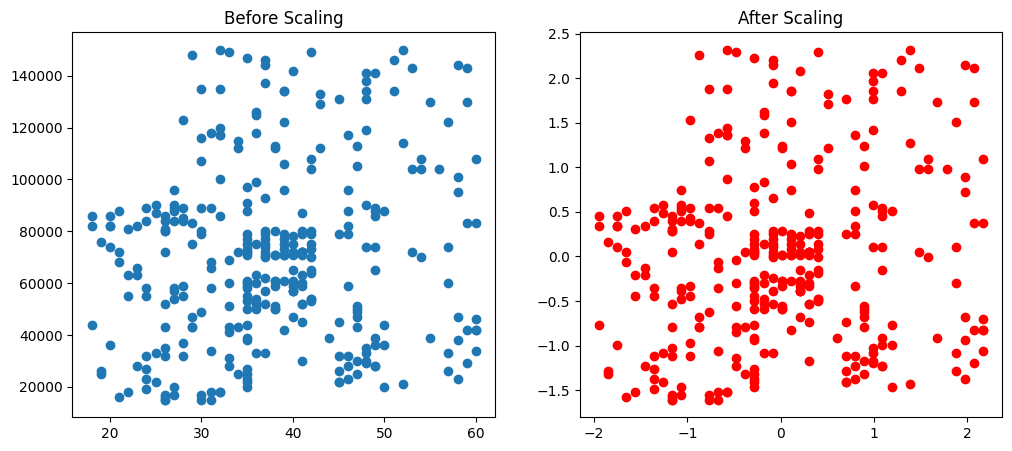

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

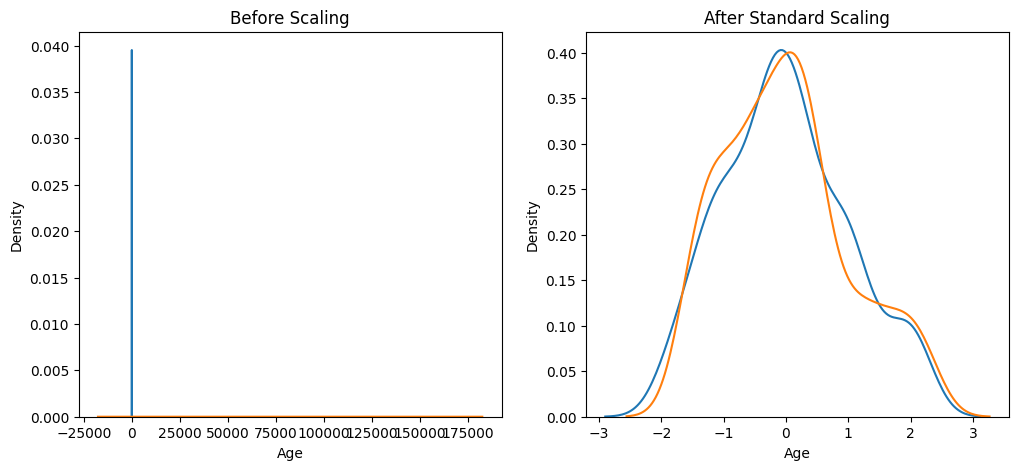

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

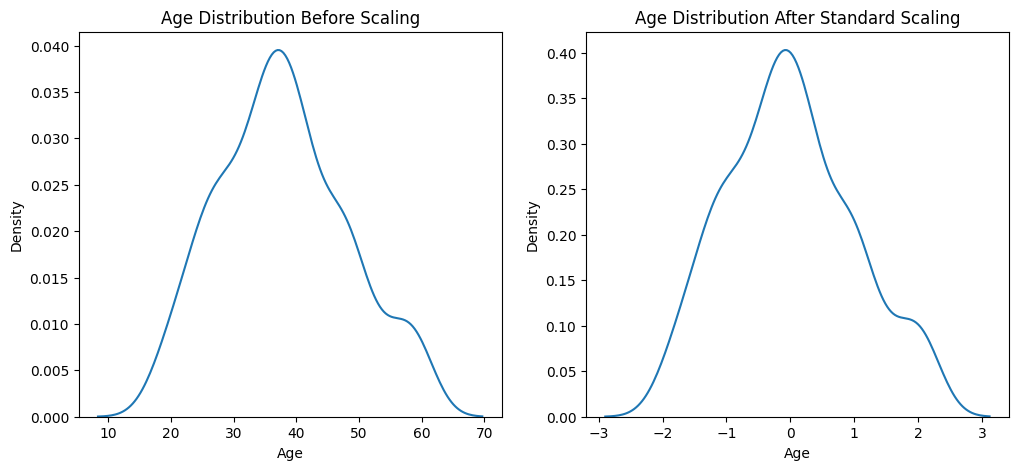

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [70]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled , y_train)

LogisticRegression()

In [71]:
y_prediction = lr.predict(X_test)
y_prediction_scaled = lr_scaled.predict(X_test_scaled)

In [72]:
# evaluation
from sklearn.metrics import accuracy_score

print("Actual",accuracy_score(y_test,y_prediction))
print("Scaled",accuracy_score(y_test,y_prediction_scaled))

Actual 0.8875
Scaled 0.8625


In [75]:
# decision tree model

from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier()
decisionTree_scaled = DecisionTreeClassifier()

In [78]:
decisionTree .fit(X_train,y_train)
decisionTree_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [80]:
y_pred = decisionTree.predict(X_test)
y_pred_scaled = decisionTree_scaled.predict(X_test_scaled)

In [81]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8375
Scaled 0.8375


 # Effect of Outlier

In [84]:
df = pd.concat([df, pd.DataFrame({'Age': [5, 90, 95],
                                  'EstimatedSalary': [1000, 250000, 350000],
                                  'Purchased': [0, 1, 1]})],
               ignore_index=True)


In [85]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


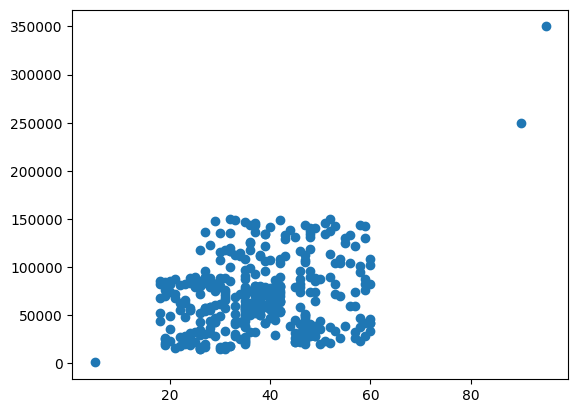

In [86]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [88]:

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [89]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

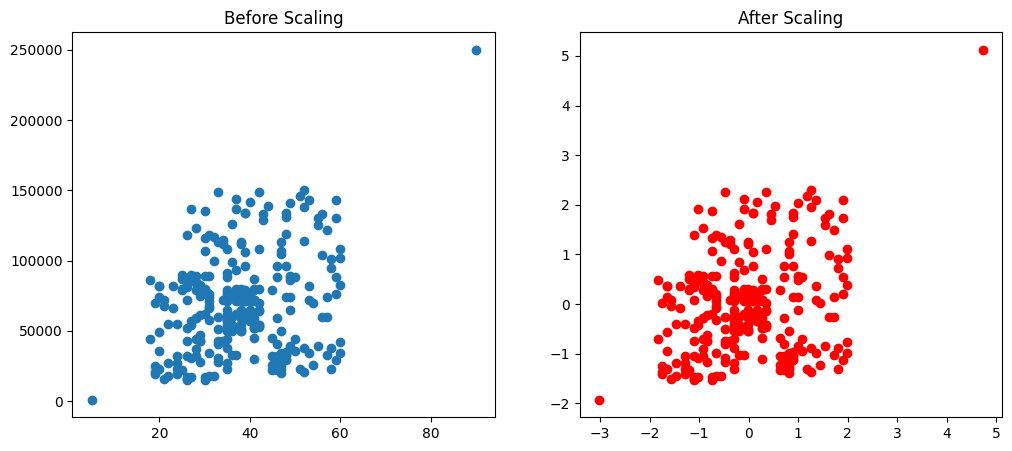

In [91]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()